In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import power_transform, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error

# Reading the dataset

In [9]:
df = pd.read_csv('Data_Train.csv')
test_data = pd.read_csv('Test_set.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.shape

(10683, 11)

In [11]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
#all column name
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

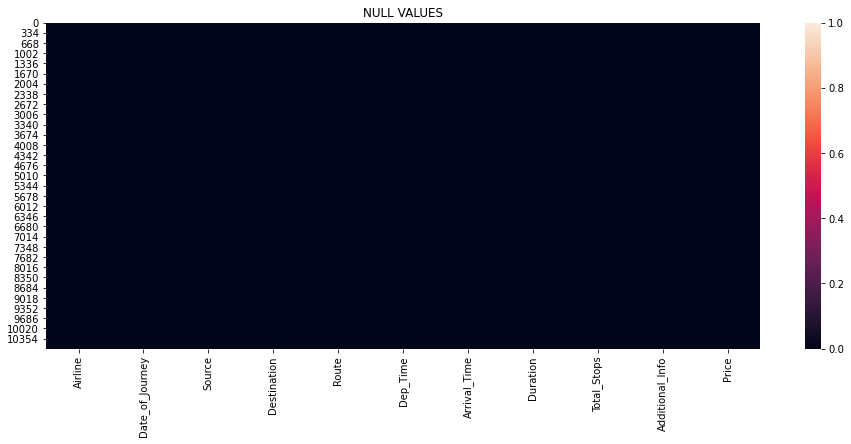

In [14]:
#checking null values using heat map so many columns are having null values  other_fuel1,other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

In [15]:
# Checking null values in the dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
df['Route'].value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
BLR ? HBX ? BOM ? BHO ? DEL             1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
CCU ? VTZ ? BLR                         1
BOM ? BLR ? CCU ? BBI ? HYD             1
CCU ? RPR ? HYD ? BLR                   1
Name: Route, Length: 128, dtype: int64

In [17]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
13h 35m      1
28h 30m      1
42h 5m       1
40h 20m      1
36h 25m      1
Name: Duration, Length: 368, dtype: int64

In [18]:
#checking for the missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Since, countable missing values were there,we have dropped it and hence, there are no null values

Converting the Date of journey column into day, month, year and day

In [21]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors = 'coerce')
df['year_jourey']  = df['Date_of_Journey'].dt.year
df['month_journey'] = df['Date_of_Journey'].dt.month
df['day_journey'] = df['Date_of_Journey'].dt.day

In [22]:
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], errors = 'coerce')
test_data['year_of_jourey']  = test_data['Date_of_Journey'].dt.year
test_data['month_of_journey'] = test_data['Date_of_Journey'].dt.month
test_data['day_of_journey'] = test_data['Date_of_Journey'].dt.day

Flight rates are differing in week days and weekends so we will extract day name to identify day

In [23]:
df['day_of_week'] = df['Date_of_Journey'].dt.day_name()
test_data['day_of_week'] = test_data['Date_of_Journey'].dt.day_name()

In [24]:
#finding the types of  airline
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Here we will merge Jet Airways Business,Vistara Premium economy and Trujet we cannot merge with anyone will keep as it is

In [28]:
df['Airline'] = np.where(df['Airline']=='Jet Airways Business','Jet Airways',
                             np.where(df['Airline']=='Vistara Premium economy','Vistara',df['Airline']))
test_data['Airline'] = np.where(test_data['Airline']=='Jet Airways Business','Jet Airways',
                             np.where(test_data['Airline']=='Vistara Premium economy','Vistara',test_data['Airline']))


In [26]:
#we can observe maximum flights are for Delhi,Kolkata and for Banglore
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [27]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Basically New Delhi is same as Delhi, changing New Delhi to Delhi


In [29]:
df['Destination'] = np.where(df['Destination']=='New Delhi','Delhi',df['Destination'])
test_data['Destination'] = np.where(test_data['Destination']=='New Delhi','Delhi',test_data['Destination'])


Let's convert the Dep_time to Mornings, afternoon, evening and night, because the flight rate differs to the departure time as well

In [30]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

test_data['Dep_minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

In [31]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_jourey,month_journey,day_journey,day_of_week,Dep_hour,Dep_minute
0,IndiGo,2019-03-24,Banglore,Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,Sunday,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,Saturday,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,Friday,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,Thursday,18,5
4,IndiGo,2019-01-03,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,Thursday,16,50


Need to covert Arrival time in Hour and Minute like departure time


In [32]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors = 'coerce')
df['Arrival_minute'] = df['Arrival_Time'].dt.minute
df['Arrival_hour'] = df['Arrival_Time'].dt.hour

test_data['Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'], errors = 'coerce')
test_data['Arrival_minute'] = test_data['Arrival_Time'].dt.minute
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour

First splitting the data to hours and minutes and creating one feature only for total_minutes

In [33]:
df['dur_hrs'] = df['Duration'].str.split('h',expand = True)[0]
df['dur_mns'] = df['Duration'].str.split('h',expand = True)[1]

test_data['dur_hrs'] = test_data['Duration'].str.split('h',expand = True)[0]
test_data['dur_mns'] = test_data['Duration'].str.split('h',expand = True)[1]

I can see there are some spaces which is nothing but 0 hence iNputing the same and removing the 'm's

In [34]:
df['dur_mns'].value_counts()

 30m    1446
        1031
 20m     997
 50m     972
 35m     939
 55m     910
 15m     903
 45m     896
 25m     803
 40m     636
 5m      623
 10m     525
Name: dur_mns, dtype: int64

Creating Total_Mins new column after addition hours and minutes

In [35]:
df['dur_mns'] = df['dur_mns'].str.replace('m','')
df['dur_mns'] = np.where(df['dur_mns']=='',0,df['dur_mns'])
df['dur_mns'] = df['dur_mns'].astype(float)
df['dur_hrs'] = df['dur_hrs'].replace('5m',0.05)
df['dur_hrs'] = df['dur_hrs'].astype(float)
df['Total_Mins'] = (df['dur_hrs']*60)+df['dur_mns']

test_data['dur_mns'] = test_data['dur_mns'].str.replace('m','')
test_data['dur_mns'] = np.where(test_data['dur_mns']=='',0,test_data['dur_mns'])
test_data['dur_mns'] = test_data['dur_mns'].astype(float)
test_data['dur_hrs'] = test_data['dur_hrs'].replace('5m',0.05)
test_data['dur_hrs'] = test_data['dur_hrs'].astype(float)
test_data['Total_Mins'] = (test_data['dur_hrs']*60)+test_data['dur_mns']

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,month_journey,day_journey,day_of_week,Dep_hour,Dep_minute,Arrival_minute,Arrival_hour,dur_hrs,dur_mns,Total_Mins
0,IndiGo,2019-03-24,Banglore,Delhi,BLR ? DEL,22:20,2021-03-22 01:10:00,2h 50m,non-stop,No info,...,3,24,Sunday,22,20,10,1,2.0,50.0,170.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2021-12-21 13:15:00,7h 25m,2 stops,No info,...,1,5,Saturday,5,50,15,13,7.0,25.0,445.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2021-06-10 04:25:00,19h,2 stops,No info,...,9,6,Friday,9,25,25,4,19.0,0.0,1140.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2021-12-21 23:30:00,5h 25m,1 stop,No info,...,12,5,Thursday,18,5,30,23,5.0,25.0,325.0
4,IndiGo,2019-01-03,Banglore,Delhi,BLR ? NAG ? DEL,16:50,2021-12-21 21:35:00,4h 45m,1 stop,No info,...,1,3,Thursday,16,50,35,21,4.0,45.0,285.0


In [37]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,month_of_journey,day_of_journey,day_of_week,Dep_minute,Dep_hour,Arrival_minute,Arrival_hour,dur_hrs,dur_mns,Total_Mins
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,2021-06-07 04:25:00,10h 55m,1 stop,No info,...,6,6,Thursday,30,17,25,4,10.0,55.0,655.0
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,2021-12-21 10:20:00,4h,1 stop,No info,...,12,5,Thursday,20,6,20,10,4.0,0.0,240.0
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,19:15,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,...,5,21,Tuesday,15,19,0,19,23.0,45.0,1425.0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,08:00,2021-12-21 21:00:00,13h,1 stop,No info,...,5,21,Tuesday,0,8,0,21,13.0,0.0,780.0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR ? DEL,23:55,2021-06-25 02:45:00,2h 50m,non-stop,No info,...,6,24,Monday,55,23,45,2,2.0,50.0,170.0


Now we will remove old columns which we have converted to other features'Date_of_Journey','Duration','dur_hrs','dur_mns','Arrival_Time','Route'

In [38]:
df = df.drop(columns = ['Date_of_Journey','Duration','dur_hrs','dur_mns','Arrival_Time','Route'])


In [39]:
test_data = test_data.drop(columns = ['Date_of_Journey','Duration','dur_hrs','dur_mns','Arrival_Time','Route'])


In [40]:
df.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,year_jourey,month_journey,day_journey,day_of_week,Dep_hour,Dep_minute,Arrival_minute,Arrival_hour,Total_Mins
0,IndiGo,Banglore,Delhi,22:20,non-stop,No info,3897,2019,3,24,Sunday,22,20,10,1,170.0
1,Air India,Kolkata,Banglore,05:50,2 stops,No info,7662,2019,1,5,Saturday,5,50,15,13,445.0
2,Jet Airways,Delhi,Cochin,09:25,2 stops,No info,13882,2019,9,6,Friday,9,25,25,4,1140.0
3,IndiGo,Kolkata,Banglore,18:05,1 stop,No info,6218,2019,12,5,Thursday,18,5,30,23,325.0
4,IndiGo,Banglore,Delhi,16:50,1 stop,No info,13302,2019,1,3,Thursday,16,50,35,21,285.0


Checking for null values

In [41]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Total_Stops        0
Additional_Info    0
Price              0
year_jourey        0
month_journey      0
day_journey        0
day_of_week        0
Dep_hour           0
Dep_minute         0
Arrival_minute     0
Arrival_hour       0
Total_Mins         1
dtype: int64

deleting the rows with null values.

In [43]:
df = df.drop(columns = 'Dep_Time')
df.dropna(inplace=True)

test_data.dropna(inplace=True)

In [44]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
year_jourey        0
month_journey      0
day_journey        0
day_of_week        0
Dep_hour           0
Dep_minute         0
Arrival_minute     0
Arrival_hour       0
Total_Mins         0
dtype: int64

No Null values present.Checking for the datatypes for further uni-variate and bi-variate analysis



In [45]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price                int64
year_jourey          int64
month_journey        int64
day_journey          int64
day_of_week         object
Dep_hour             int64
Dep_minute           int64
Arrival_minute       int64
Arrival_hour         int64
Total_Mins         float64
dtype: object

<AxesSubplot:xlabel='Price', ylabel='Airline'>

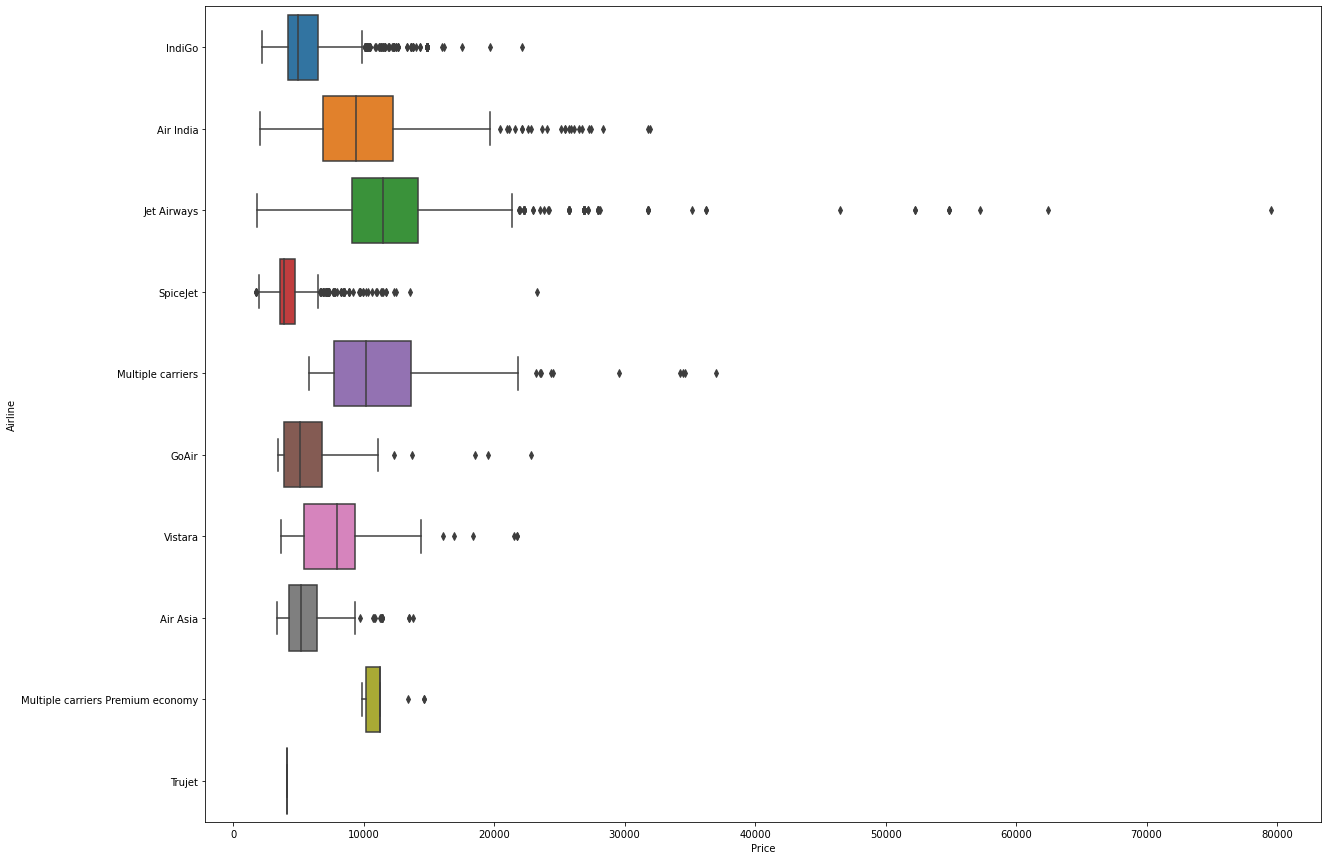

In [46]:
plt.figure(figsize = (20,15))
sns.boxplot(y = 'Airline', x ='Price', data = df)

<AxesSubplot:xlabel='Price', ylabel='Airline'>

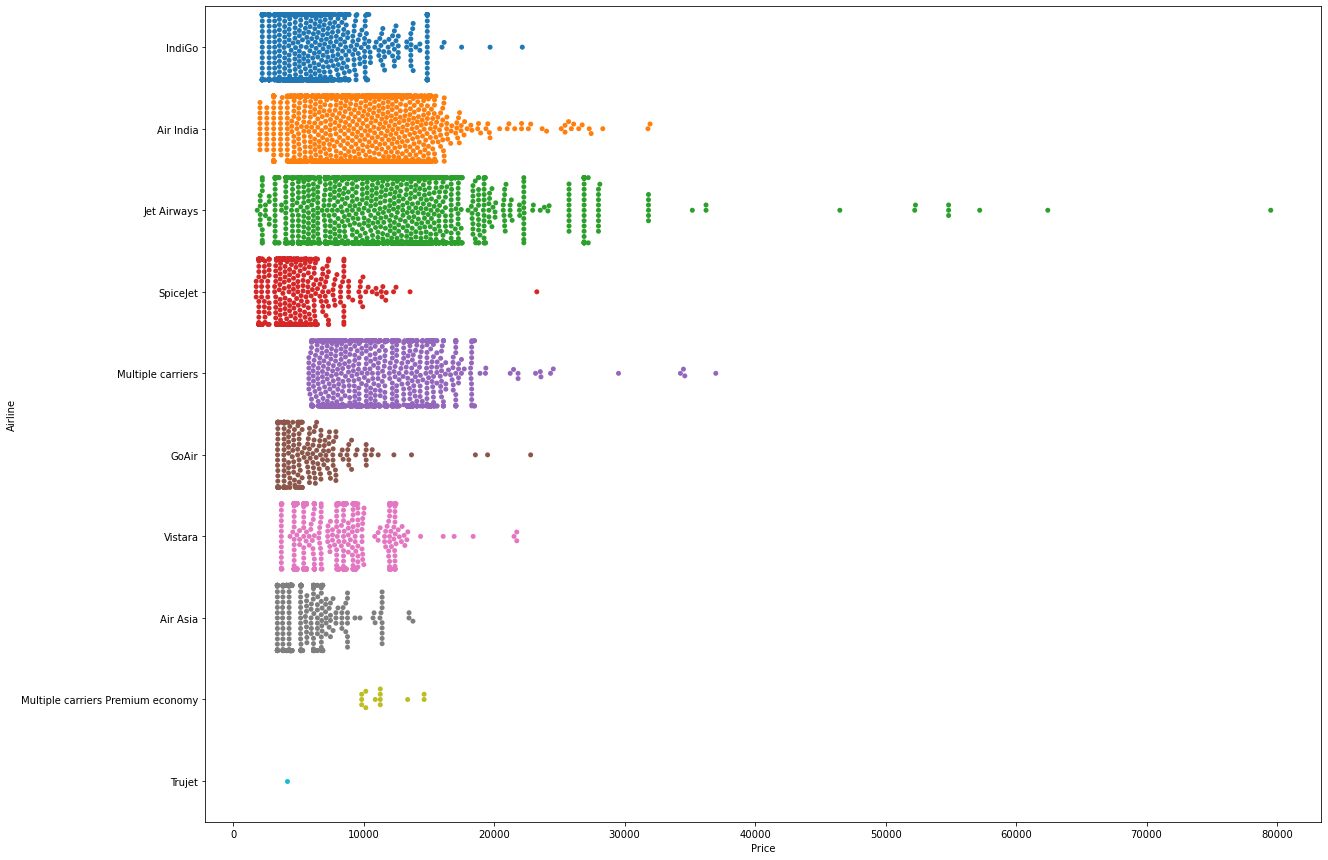

In [47]:
#Here with swarmplot will compare 'Airline', and 'Price
plt.figure(figsize = (20,15))
sns.swarmplot(y = 'Airline', x ='Price', data = df)

Here we can observe price range is different for Airline and maximum range is in between 3000 to 20000

Source and Price


<AxesSubplot:xlabel='Price', ylabel='Source'>

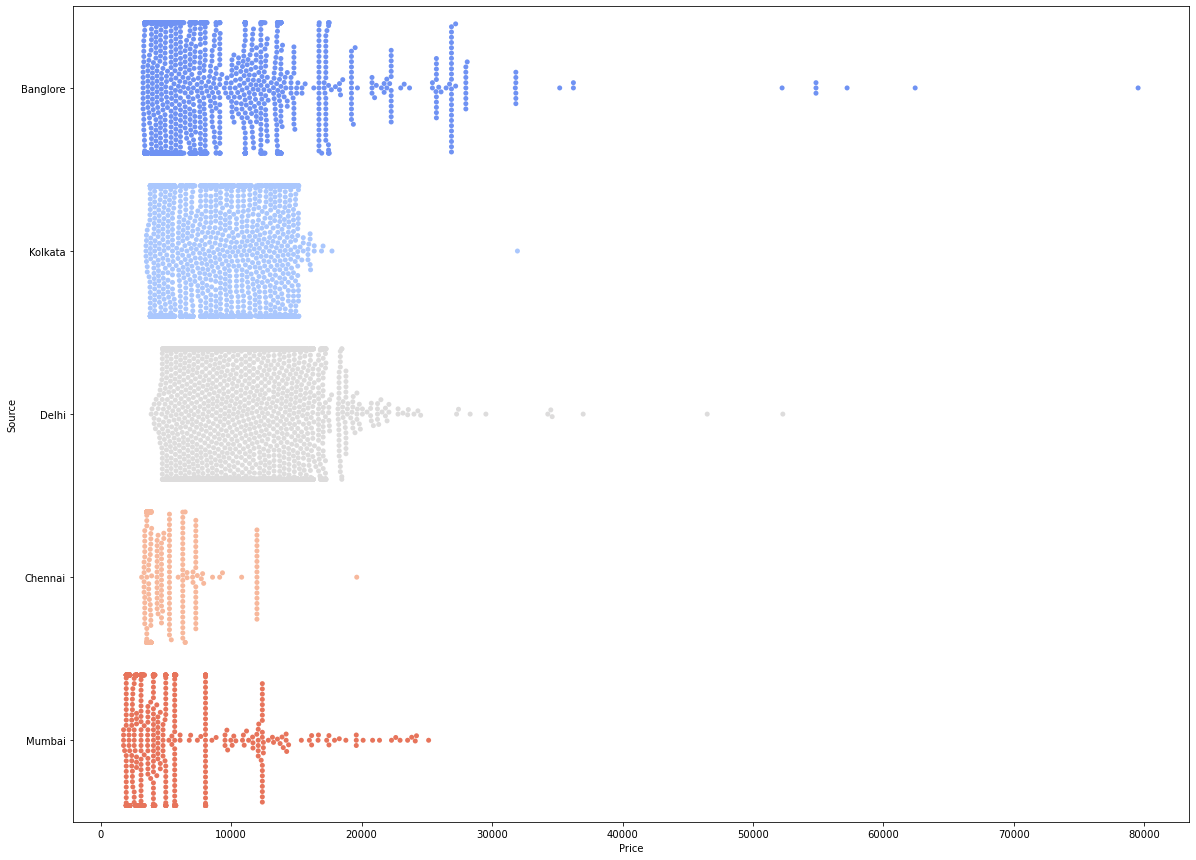

In [48]:
plt.figure(figsize = (20,15))
sns.swarmplot(y = 'Source', x ='Price', data = df, palette = 'coolwarm')

From the above plot I can say that the flight prices range in Mumbai and Chennai is lesser than other source states and there is less number of people taking flights when compared to other cities


Destination and Price


<AxesSubplot:xlabel='Price', ylabel='Destination'>

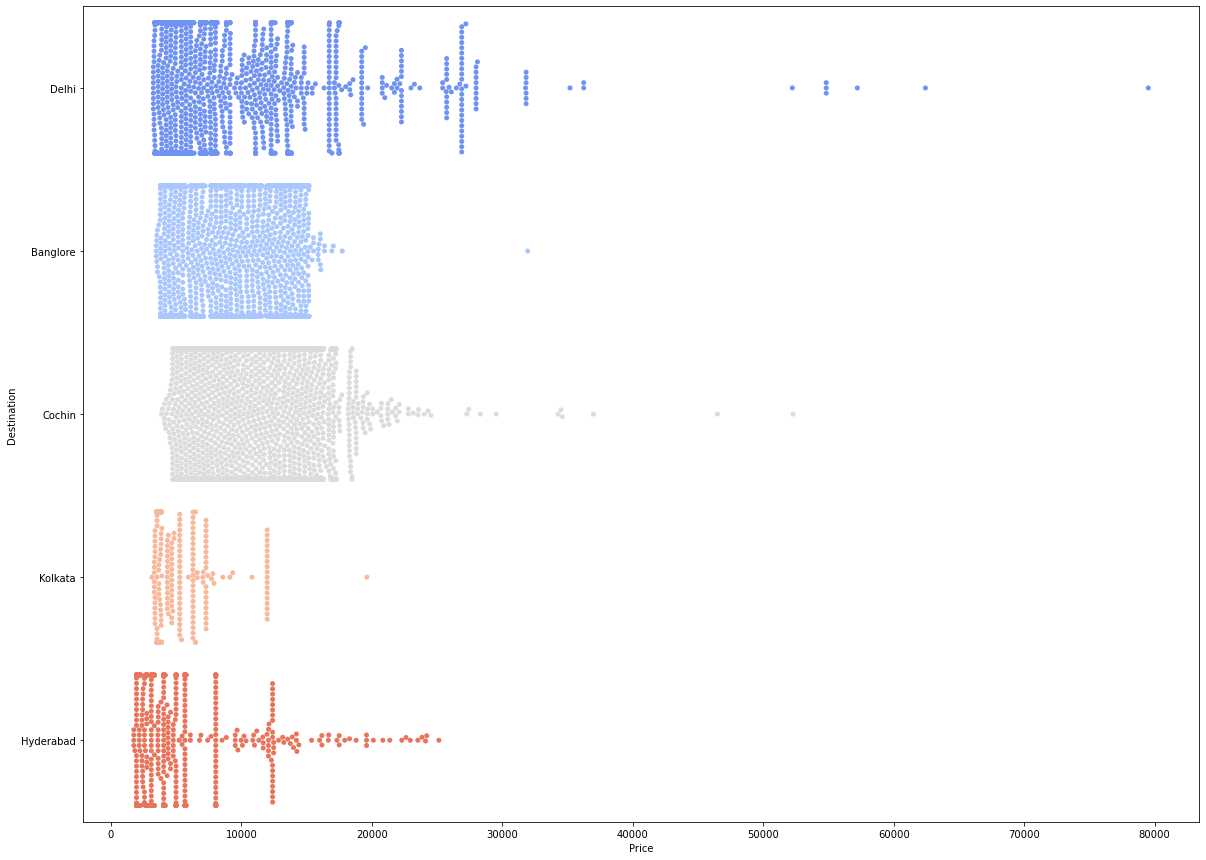

In [49]:
plt.figure(figsize = (20,15))
sns.swarmplot(y = 'Destination', x ='Price', data = df,palette = 'coolwarm')

Upon reviewing the above graph I can conclude that the flights travelling to Hyderabad and Kolkata had lesser price when aompared to other states. and the people travelling were also less.

Price and Total Stops


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

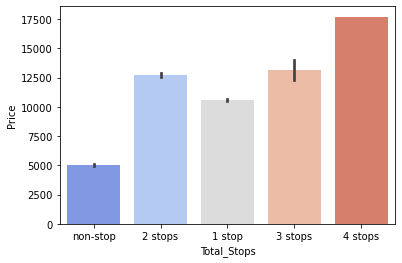

In [50]:
sns.barplot(y = 'Price', x ='Total_Stops', data = df,palette = 'coolwarm')

From the above figure we can say that the number of stops is directly proportional to increase in flight price. Flights without any stops recorded the lowest price

Additional info and price

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

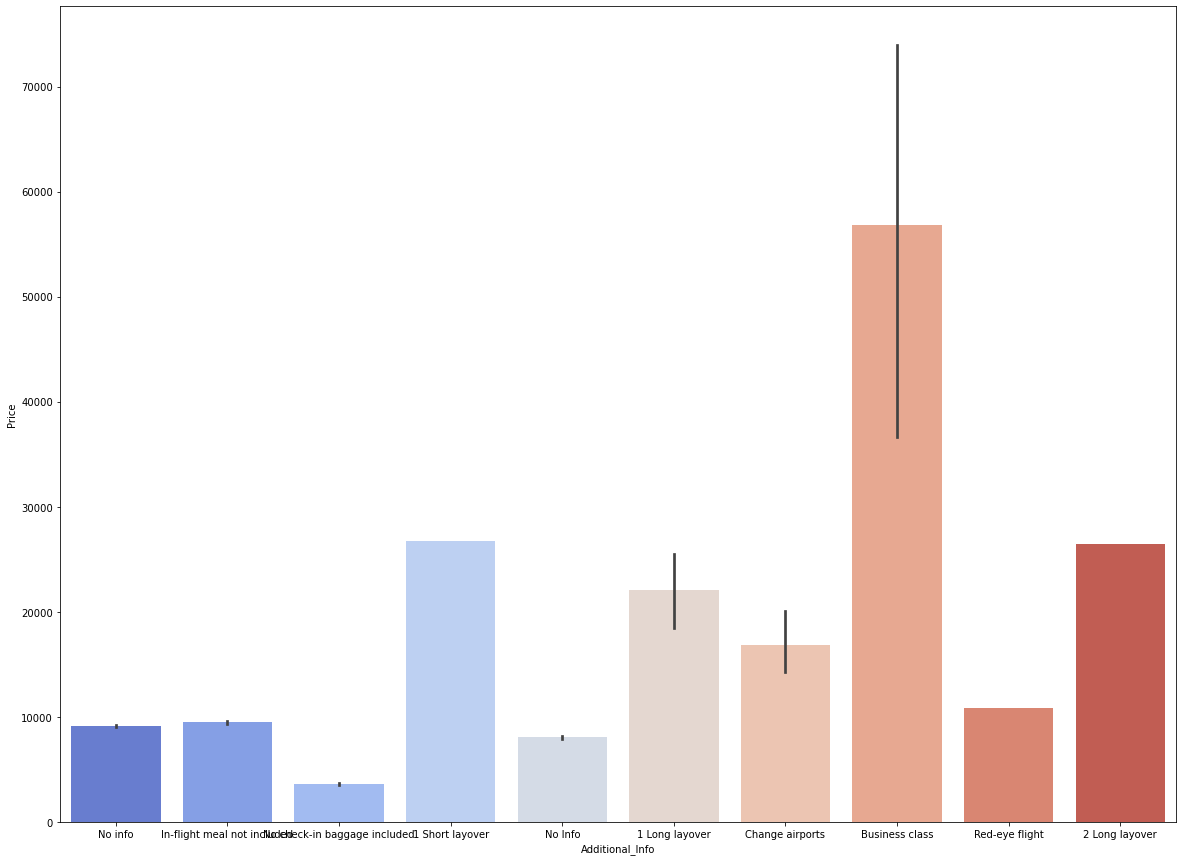

In [51]:
plt.figure(figsize = (20,15))
sns.barplot(y = 'Price', x ='Additional_Info', data = df,palette = 'coolwarm')

From the above analysis, I can say that business class passengers had paid higher price when compared to others. The lowest was for the baggage included customers

Year of journey and price


<AxesSubplot:xlabel='year_jourey', ylabel='Price'>

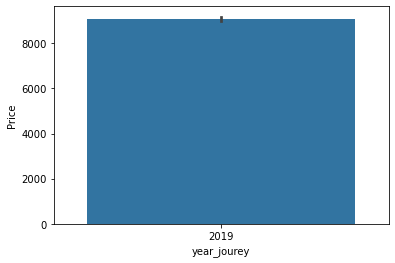

In [52]:
sns.barplot(y = 'Price', x ='year_jourey', data = df)

Only one year data is present so better we drop the year_jourey column


In [53]:
df = df.drop(columns = 'year_jourey')

In [54]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'month_journey', 'day_journey', 'day_of_week', 'Dep_hour',
       'Dep_minute', 'Arrival_minute', 'Arrival_hour', 'Total_Mins'],
      dtype='object')

Month of Journey V/s Price

<AxesSubplot:xlabel='month_journey', ylabel='Price'>

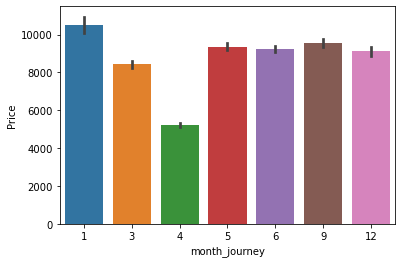

In [55]:
sns.barplot(y = 'Price', x ='month_journey', data = df)

We can observe highest price is in January and lowest is in April month

Day of week v/s Price

<AxesSubplot:xlabel='day_of_week', ylabel='Price'>

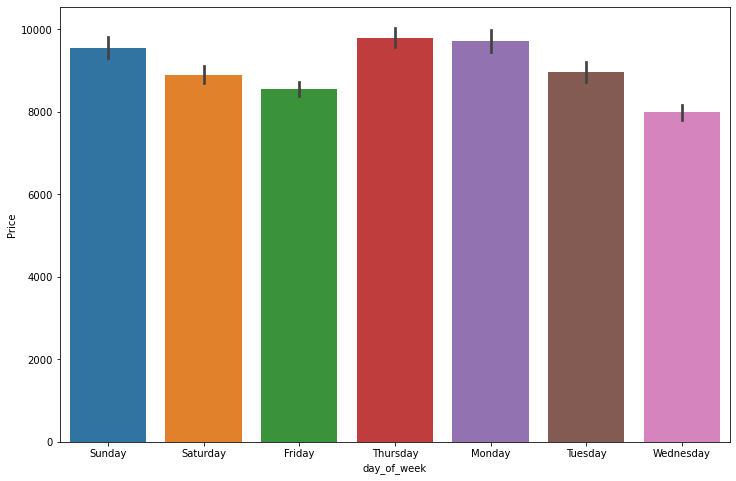

In [57]:
plt.figure(figsize = (12,8))
sns.barplot(y = 'Price', x ='day_of_week', data = df)

Highest price is on Monday and thursday and lowest price on friday and wednsday

Total duration of travel (Total Mins) and Price

Let's encode the categorical variables

In [58]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price                int64
month_journey        int64
day_journey          int64
day_of_week         object
Dep_hour             int64
Dep_minute           int64
Arrival_minute       int64
Arrival_hour         int64
Total_Mins         float64
dtype: object

Using the ordinal encoder to encode the categorical variables

In [62]:
enc = OrdinalEncoder()
for col in df:
    if df[col].dtypes == 'object':
        df[col] = enc.fit_transform(df[col].values.reshape(-1,1))

In [64]:
enc = OrdinalEncoder()
for col in test_data:
    if test_data[col].dtypes == 'object':
        test_data[col] = enc.fit_transform(test_data[col].values.reshape(-1,1))

In [65]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month_journey,day_journey,day_of_week,Dep_hour,Dep_minute,Arrival_minute,Arrival_hour,Total_Mins
0,3.0,0.0,2.0,4.0,8.0,3897,3,24,3.0,22,20,10,1,170.0
1,1.0,3.0,0.0,1.0,8.0,7662,1,5,2.0,5,50,15,13,445.0
2,4.0,2.0,1.0,1.0,8.0,13882,9,6,0.0,9,25,25,4,1140.0
3,3.0,3.0,0.0,0.0,8.0,6218,12,5,4.0,18,5,30,23,325.0
4,3.0,0.0,2.0,0.0,8.0,13302,1,3,4.0,16,50,35,21,285.0


In [66]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,year_of_jourey,month_of_journey,day_of_journey,day_of_week,Dep_minute,Dep_hour,Arrival_minute,Arrival_hour,Total_Mins
0,4.0,2.0,1.0,138.0,0.0,5.0,2019,6,6,4.0,30,17,25,4,655.0
1,3.0,3.0,0.0,31.0,0.0,5.0,2019,12,5,4.0,20,6,20,10,240.0
2,4.0,2.0,1.0,156.0,0.0,3.0,2019,5,21,5.0,15,19,0,19,1425.0
3,5.0,2.0,1.0,48.0,0.0,5.0,2019,5,21,5.0,0,8,0,21,780.0
4,0.0,0.0,2.0,198.0,4.0,5.0,2019,6,24,1.0,55,23,45,2,170.0


In [70]:
x=df.drop(columns = 'Price')

Checking for correlation coefficient

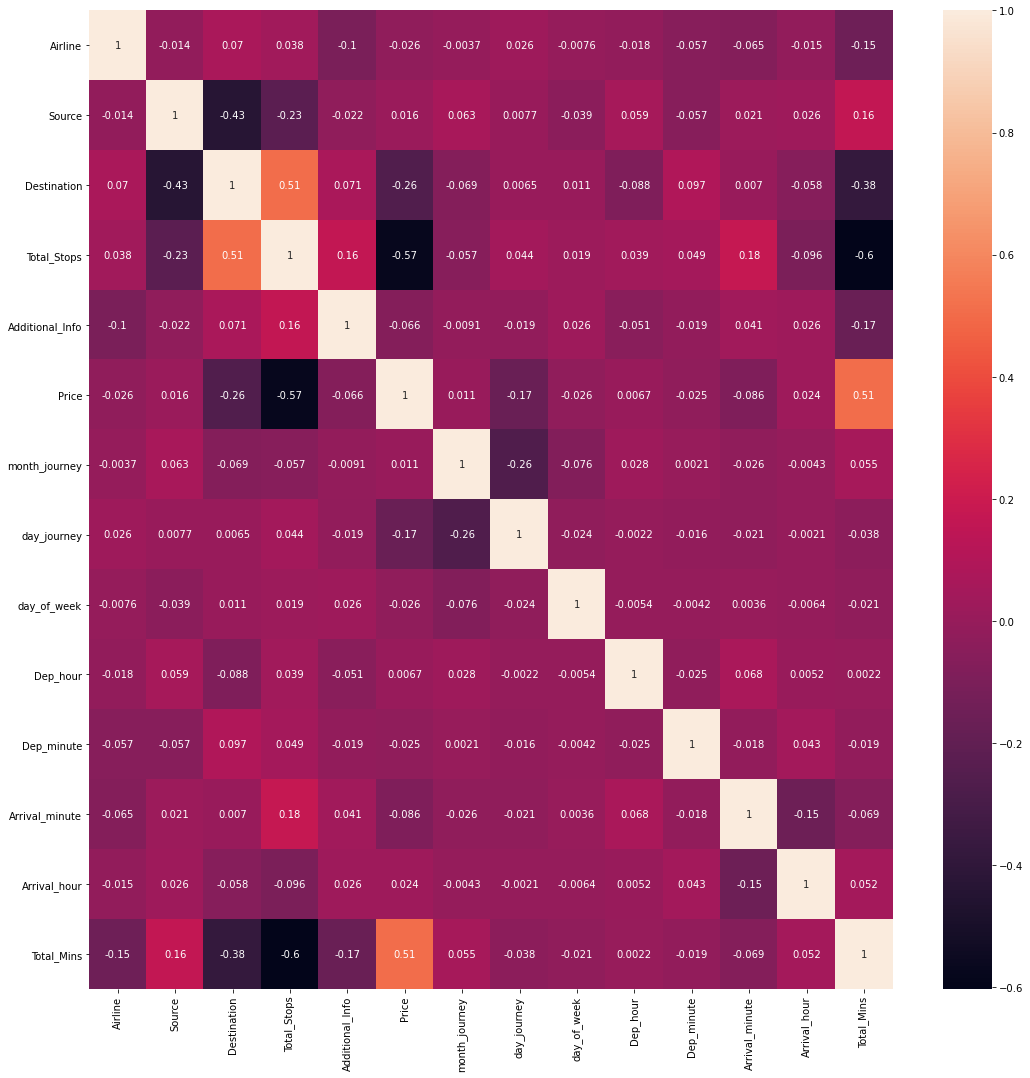

In [71]:
#correlation between intependent and dependent variables
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see from the above coefficient, Total Mins has highest positive correlation of 0.5 and Total stops have highest negative correlation of -0.6 There is no multi-collinearity issue with the dataset and the highest correlation coeffcient is -0.6 between total mins v/s total stops

Checking for outliers in the continuous data columns for independent variables

In [74]:
df.skew()

Airline            0.543649
Source            -0.424188
Destination        0.846936
Total_Stops        0.631438
Additional_Info   -1.779539
Price              1.813100
month_journey      0.629572
day_journey        0.367073
day_of_week       -0.065364
Dep_hour           0.113075
Dep_minute         0.167415
Arrival_minute     0.110928
Arrival_hour      -0.370033
Total_Mins         0.861395
dtype: float64

Airline               AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Source             AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Destination        AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Total_Stops        AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Additional_Info    AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Price              AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
month_journey      AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
day_journey           AxesSubplot(0.125,0.593621;0.0945122x0.130172)
day_of_week        AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Dep_hour           AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Dep_minute         AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Arrival_minute     AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Arrival_hour       AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Total_Mins         AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
dtype: object

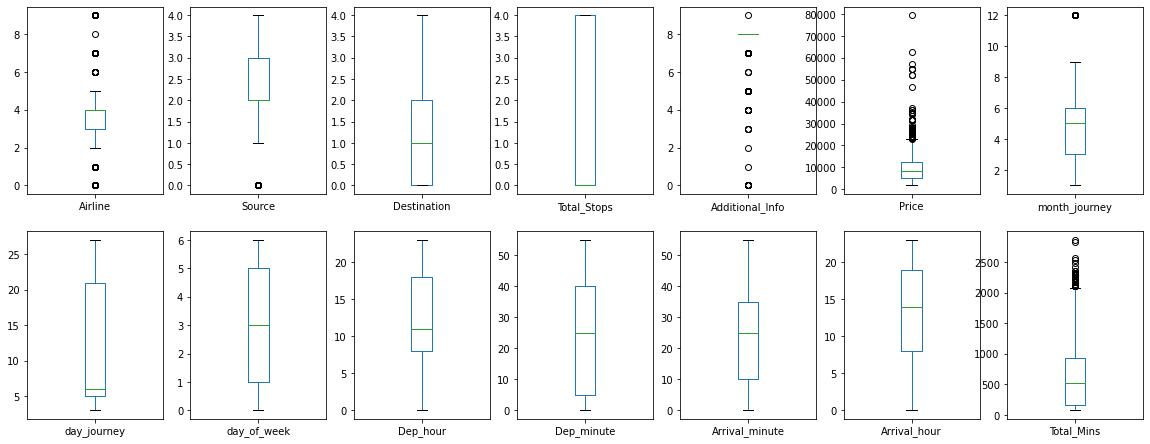

In [75]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

# Removing outliers

There are few outliers for the Total Mins, let's remove them using Zscore method

In [76]:
z = np.abs(zscore(df[['Total_Mins']]))
ztest = np.abs(zscore(test_data[['Total_Mins']]))
z

array([[0.93164066],
       [0.39008098],
       [0.97858803],
       ...,
       [0.91194758],
       [0.95133374],
       [0.28176904]])

In [77]:
ztest

array([[0.02991933],
       [0.79671361],
       [1.56367202],
       ...,
       [0.48797119],
       [0.54780985],
       [0.43825608]])

In [78]:
df_new = df[(z<2).all(axis = 1)]
df_new

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month_journey,day_journey,day_of_week,Dep_hour,Dep_minute,Arrival_minute,Arrival_hour,Total_Mins
0,3.0,0.0,2.0,4.0,8.0,3897,3,24,3.0,22,20,10,1,170.0
1,1.0,3.0,0.0,1.0,8.0,7662,1,5,2.0,5,50,15,13,445.0
2,4.0,2.0,1.0,1.0,8.0,13882,9,6,0.0,9,25,25,4,1140.0
3,3.0,3.0,0.0,0.0,8.0,6218,12,5,4.0,18,5,30,23,325.0
4,3.0,0.0,2.0,0.0,8.0,13302,1,3,4.0,16,50,35,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,4.0,8.0,4107,9,4,6.0,19,55,25,22,150.0
10679,1.0,3.0,0.0,4.0,8.0,4145,4,27,2.0,20,45,20,23,155.0
10680,4.0,0.0,2.0,4.0,8.0,7229,4,27,2.0,8,20,20,11,180.0
10681,9.0,0.0,2.0,4.0,8.0,12648,1,3,4.0,11,30,10,14,160.0


In [79]:
test_new = test_data[(ztest<2).all(axis = 1)]
test_new

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,year_of_jourey,month_of_journey,day_of_journey,day_of_week,Dep_minute,Dep_hour,Arrival_minute,Arrival_hour,Total_Mins
0,4.0,2.0,1.0,138.0,0.0,5.0,2019,6,6,4.0,30,17,25,4,655.0
1,3.0,3.0,0.0,31.0,0.0,5.0,2019,12,5,4.0,20,6,20,10,240.0
2,4.0,2.0,1.0,156.0,0.0,3.0,2019,5,21,5.0,15,19,0,19,1425.0
3,5.0,2.0,1.0,48.0,0.0,5.0,2019,5,21,5.0,0,8,0,21,780.0
4,0.0,0.0,2.0,198.0,4.0,5.0,2019,6,24,1.0,55,23,45,2,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,170.0,0.0,5.0,2019,6,6,4.0,30,20,25,20,1435.0
2667,3.0,3.0,0.0,106.0,4.0,5.0,2019,3,27,6.0,20,14,55,16,155.0
2668,4.0,2.0,1.0,183.0,0.0,5.0,2019,6,3,1.0,50,21,25,4,395.0
2669,1.0,2.0,1.0,11.0,0.0,5.0,2019,6,3,1.0,0,4,15,19,915.0


In [80]:
df.shape

(10681, 14)

In [81]:
df_new.shape

(10330, 14)

In [82]:
# Let's check the the data loss
data_loss = (10681-10330)/10681*100
data_loss

3.286209156446026

Data Loss is 3% there fore proeeding with the outlier removal

Checking for data distribution

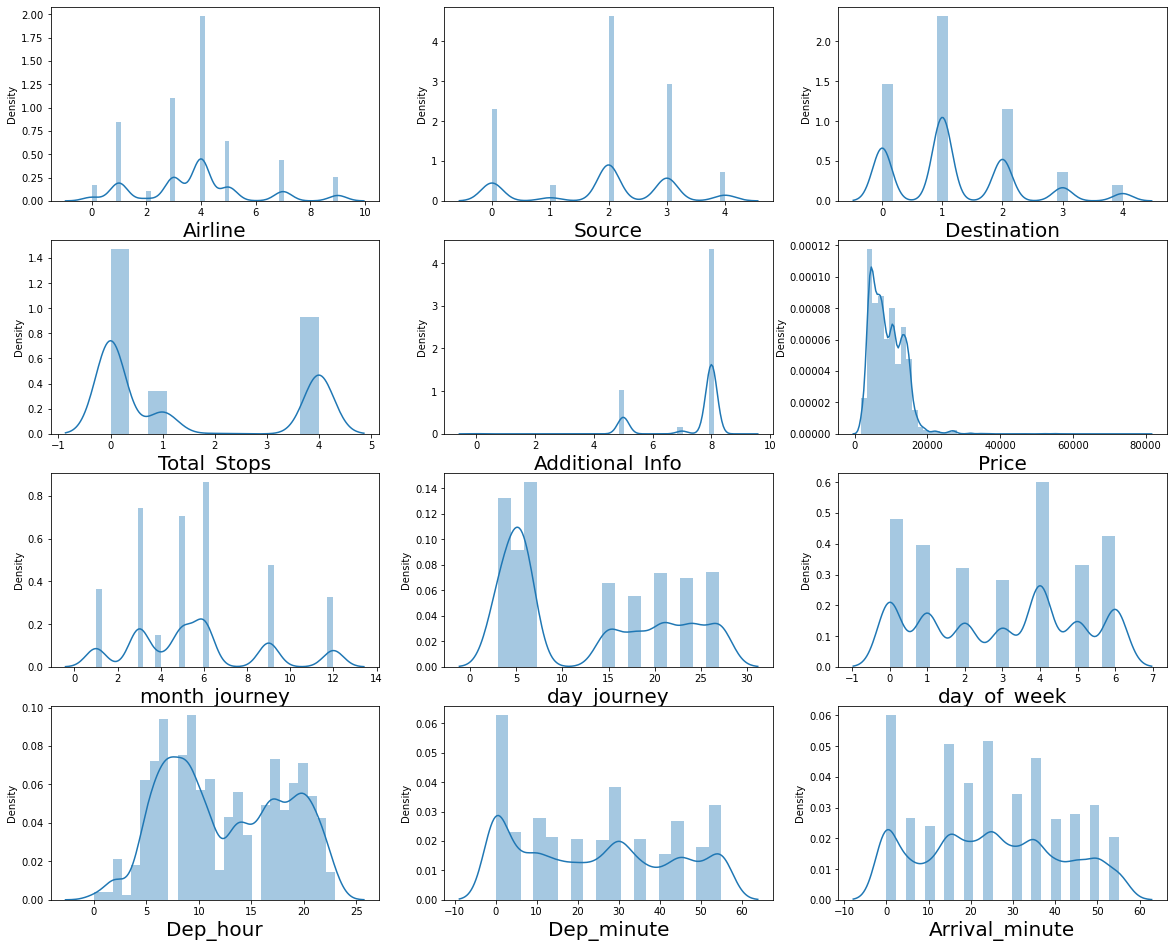

In [83]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_new.columns:
    if plotnumber<=12:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

I can see the skewness on continuous data column let's check for skewness coefficient

In [84]:
df_new.skew()

Airline            0.537341
Source            -0.407003
Destination        0.834383
Total_Stops        0.595694
Additional_Info   -1.779329
Price              1.895586
month_journey      0.630161
day_journey        0.368435
day_of_week       -0.063804
Dep_hour           0.105050
Dep_minute         0.164900
Arrival_minute     0.105797
Arrival_hour      -0.351588
Total_Mins         0.742273
dtype: float64

total mins column has skewness above the limit (-0.5 to +0.5) otherwise skewness is almost removed

Splitting the dataset to x and y

In [86]:
x = df_new.drop(columns = 'Price')
y = df_new['Price']

Scaling the independent variables using Min Max Scaler

In [87]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
sc_data = scal.fit_transform(x)
x = pd.DataFrame(sc_data, columns = x.columns)

In [88]:
scal = MinMaxScaler()
sctest_data = scal.fit_transform(test_new)
test_new = pd.DataFrame(sctest_data, columns = test_new.columns)

In [89]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,month_journey,day_journey,day_of_week,Dep_hour,Dep_minute,Arrival_minute,Arrival_hour,Total_Mins
0,0.333333,0.00,0.50,1.00,0.888889,0.181818,0.875000,0.500000,0.956522,0.363636,0.181818,0.043478,0.060127
1,0.111111,0.75,0.00,0.25,0.888889,0.000000,0.083333,0.333333,0.217391,0.909091,0.272727,0.565217,0.234177
2,0.444444,0.50,0.25,0.25,0.888889,0.727273,0.125000,0.000000,0.391304,0.454545,0.454545,0.173913,0.674051
3,0.333333,0.75,0.00,0.00,0.888889,1.000000,0.083333,0.666667,0.782609,0.090909,0.545455,1.000000,0.158228
4,0.333333,0.00,0.50,0.00,0.888889,0.000000,0.000000,0.666667,0.695652,0.909091,0.636364,0.913043,0.132911


Using power transform to reduce the skewness on the dataset

In [90]:
tr_data = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr_data, columns = x.columns)


tr_data = power_transform(test_new, method = 'yeo-johnson')
test_new = pd.DataFrame(tr_data, columns = test_new.columns)

In [91]:
test_new = test_new.drop(columns = 'year_of_jourey')

Let's check for skewness again

In [92]:
x.skew()

Airline           -0.000264
Source            -0.111119
Destination        0.046940
Total_Stops        0.409294
Additional_Info   -1.332793
month_journey      0.012927
day_journey        0.138564
day_of_week       -0.093177
Dep_hour          -0.022864
Dep_minute        -0.022717
Arrival_minute    -0.038941
Arrival_hour      -0.160383
Total_Mins         0.152915
dtype: float64

Now we can observe skewness is removed

Checking for outliers again

Airline               AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Source             AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Destination        AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Total_Stops        AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Additional_Info    AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Price              AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
month_journey      AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
day_journey           AxesSubplot(0.125,0.593621;0.0945122x0.130172)
day_of_week        AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Dep_hour           AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Dep_minute         AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Arrival_minute     AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Arrival_hour       AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Total_Mins         AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
dtype: object

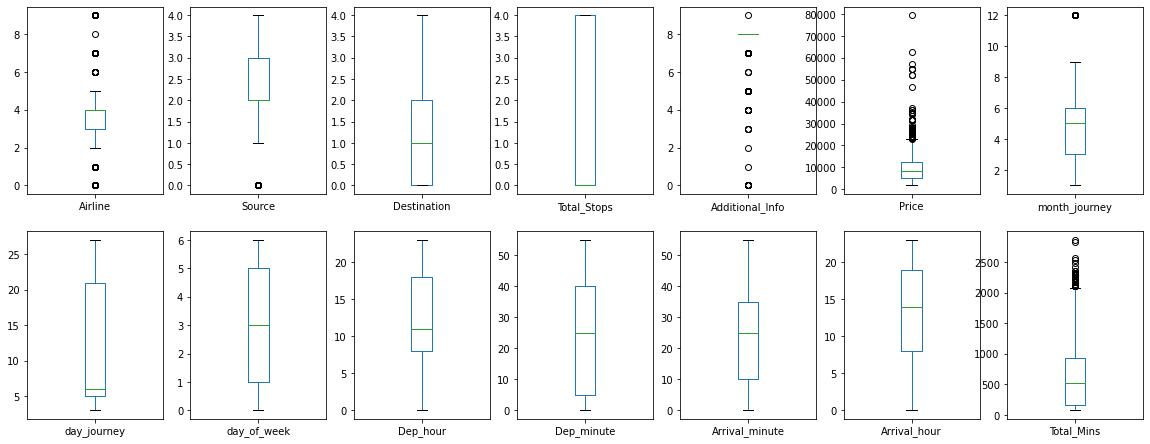

In [95]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

Outliers are removed for continuous data columns

Proceeding with model building

# Model Preparation


Finding the best random state to split the dataset

In [96]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [97]:
#find out which is best random state for spliting train and test data
from sklearn.tree import DecisionTreeRegressor
maxAccuracy=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    modDTR = DecisionTreeRegressor()
    
    # Training the model
    modDTR.fit(x_train, y_train)
    
    # Predcting the value
    pred = modDTR.predict(x_test)
    
    # r2 score
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is ",maxAccuracy," on Random_state ",maxRS)

Best accuracy is  0.8679797156542282  on Random_state  163


Splitting the train test data using the best random state

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =maxRS)

Splitting the train test data using the best random state

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =maxRS)

Model 1: LinearRegression

In [106]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_test)
lin_score = lin.score(x_test,y_test)
lin_score

0.38517687601411443

In [107]:
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
print('RMSE for Linear Regression: ', lin_rmse)

RMSE for Linear Regression:  3759.4152938547504


Model 2: Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
rfr_score

0.8670875309734357

In [109]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  1747.9462349864007


Model 3: Extra Trees Regressor

In [110]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
et_score

0.8928379678573508

In [111]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Extra Trees Regression: ', et_rmse)

RMSE for Extra Trees Regression:  1569.5157477147436


Model 4: XGB Regressor

In [112]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = xgb.score(x_test,y_test)
xgb_score

0.8821360881543425

In [113]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
print('RMSE for XGB Regression: ', xgb_rmse)

RMSE for XGB Regression:  1646.0219894790891


Model 5: KNN Regressor

In [114]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_test)
kn_score = kn.score(x_test,y_test)
kn_score

0.7161696595679923

In [115]:
kn_rmse = np.sqrt(mean_squared_error(y_test,kn_pred))
print('RMSE for KNeighbors Regression: ', kn_rmse)

RMSE for KNeighbors Regression:  2554.3159558943175


Model 6,7: Lasso and Ridge Regression

In [116]:
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modls=Lasso()
dfnew=GridSearchCV(modls,parameters)
dfnew.fit(x_train,y_train)
print(dfnew.best_params_)

{'alpha': 10, 'random_state': 0}


In [117]:
modls=Lasso(alpha=10,random_state=0)
modls.fit(x_train,y_train)
modls_pred = modls.predict(x_test)
modls_score = modls.score(x_test,y_test)
modls_score

0.38543453610233114

In [118]:
modls_rmse = np.sqrt(mean_squared_error(y_test,modls_pred))
print('RMSE for Lasso Regression: ', modls_rmse)


RMSE for Lasso Regression:  3758.627463383405


In [119]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modlr=Ridge()
dfnew=GridSearchCV(modlr,parameters)
dfnew.fit(x_train,y_train)
print(dfnew.best_params_)

{'alpha': 10, 'random_state': 0}


In [120]:
modlr=Ridge(alpha=10,random_state=0)
modlr.fit(x_train,y_train)
modlr_pred = modlr.predict(x_test)
modlr_score = modlr.score(x_test,y_test)
modlr_score

0.38519794537465213

In [121]:
modlr_rmse = np.sqrt(mean_squared_error(y_test,modlr_pred))
print('RMSE for Ridge Regression: ', modlr_rmse)

RMSE for Ridge Regression:  3759.3508776415692


Model 8:Adaboost Regressor

In [122]:
AB = AdaBoostRegressor()
AB.fit(x_train,y_train)
AB_pred = AB.predict(x_test)
AB_score = AB.score(x_test,y_test)
AB_score

0.5427047229768034

In [123]:
AB_rmse = np.sqrt(mean_squared_error(y_test,AB_pred))
print('RMSE for Adaboost Regression: ', AB_rmse)

RMSE for Adaboost Regression:  3242.2280982336056


Model 9:GradientBoosting Regressor

In [124]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB_pred = GB.predict(x_test)
GB_score = GB.score(x_test,y_test)
GB_score

0.7725059708751225

In [125]:
GB_rmse = np.sqrt(mean_squared_error(y_test,GB_pred))
print('RMSE for GradientBoosting Regression: ', GB_rmse)

RMSE for GradientBoosting Regression:  2286.8106624266916


Checking for over fitting model using cross val score

In [126]:
from sklearn.model_selection import cross_val_score
print("Linear Regression:",cross_val_score(lin,x,y,cv=5,scoring="r2").mean())
print("Random Forest Regressor:",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Extra Trees Regressor:",cross_val_score(et,x,y,cv=5,scoring="r2").mean())
print("Adaboost Regressor:",cross_val_score(AB,x,y,cv=5,scoring="r2").mean())
print("K-Neighbors Regressor:",cross_val_score(kn,x,y,cv=5,scoring="r2").mean())
print("Lasso Regression:",cross_val_score(modls,x,y,cv=5,scoring="r2").mean())
print("Ridge Regression:",cross_val_score(modlr,x,y,cv=5,scoring="r2").mean())
print("GradientBoost Regressor:",cross_val_score(GB,x,y,cv=5,scoring="r2").mean())
print("Decision Tree Regressor:",cross_val_score(modDTR,x,y,cv=5,scoring="r2").mean())

Linear Regression: 0.40891699027532413
Random Forest Regressor: 0.8640629979238252
Extra Trees Regressor: 0.8912077347348373
Adaboost Regressor: 0.4068055756287591
K-Neighbors Regressor: 0.7170593546151294
Lasso Regression: 0.408959690422221
Ridge Regression: 0.40891973435527873
GradientBoost Regressor: 0.7953852875764452
Decision Tree Regressor: 0.7567391765342624


# Selecting the best model

We can see Extra Trees Regressor is the giving maximum accuracy so we will do hyper parameter tuing

# Hyper parameter tuning


In [127]:
params = {'n_estimators':[100,150,200,250],
         'max_depth':[11,13,15,17],
         'min_samples_split':[3,4,6,8],
         'bootstrap':[True, False],'n_jobs':[-1,-2,-3]}

In [128]:
gcv = GridSearchCV(ExtraTreesRegressor(),params,cv =5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [11, 13, 15, 17],
                         'min_samples_split': [3, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [129]:
gcv.best_params_

{'bootstrap': False,
 'max_depth': 17,
 'min_samples_split': 3,
 'n_estimators': 150,
 'n_jobs': -1}

In [130]:
fnl_mod = ExtraTreesRegressor(bootstrap = False, max_depth = 17, min_samples_split = 3, n_estimators = 150,n_jobs =-2)
fnl_mod.fit(x_train,y_train)
fnl_pred = fnl_mod.predict(x_test)
fnl_score = fnl_mod.score(x_test,y_test)
print(' The R2 score for the hyper tuned model is', fnl_score)

 The R2 score for the hyper tuned model is 0.8942611360153742


After Hyperparameter Tunning Score is improved by 0.4%.So we will hoose Extra Tree regressoras best model for this system

In [131]:
fnl_rmse = np.sqrt(mean_squared_error(y_test,fnl_pred))
print('RMSE for Extra Tree Regression: ', fnl_rmse)

RMSE for Extra Tree Regression:  1559.0589162424287


# Saving the final model

In [132]:
import pickle
filename='FlightPricePredict.pkl'
pickle.dump(fnl_mod,open(filename,'wb'))

,Y Test,Pred
7332,8372,8450.427926
30,3687,3748.138060
2779,12692,13574.756311
5886,2175,1969.020000
6873,16736,14828.607769


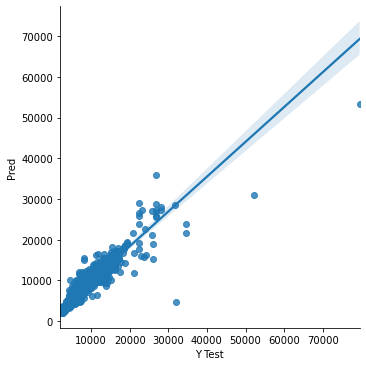

In [133]:
res=pd.DataFrame()
res['Actual']=y_test
pred_lr=fnl_mod.predict(x_test)

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()